In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
urls = ['https://foursquare.com/explore?cat=food&mode=url&near=Hitteen%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009304' ,
        'https://foursquare.com/explore?cat=food&mode=url&near=Al-Muhammadiyah%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009345'
       ,'https://foursquare.com/explore?cat=food&mode=url&near=As-Sahafa%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009299',
        'https://foursquare.com/explore?cat=food&mode=url&near=Al-Maseef%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009263' , 
        'https://foursquare.com/explore?cat=food&mode=url&near=Al-Olaya%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009301',
        'https://foursquare.com/explore?cat=food&mode=url&near=Al-Olaya%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009301',
        'https://foursquare.com/explore?cat=food&mode=url&near=Qurtubah%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009380',
       'https://foursquare.com/explore?cat=food&mode=url&near=An-Narjis%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009363',
       'https://foursquare.com/explore?cat=food&mode=url&near=Al-Nakheel%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009289'
       ,'https://foursquare.com/explore?cat=food&mode=url&near=Al-Nuzha%2C%20Riyadh%2C%20Saudi%20Arabia&nearGeoId=10009378'       
       ]
locations = ['Hitteen' , 'Al-Muhammadiyah' , 'As-Sahafa' ,'Al-Maseef' , 
             'Al-Malqa' ,'Al-Olaya' , 'Qurtubah' ,'An-Narjis' , 'Al-Nakheel' , 'Al-Nuzha' ]


In [26]:
df = pd.DataFrame()
for i in range(len(locations)):
    response = requests.get(urls[i])
    soup = BeautifulSoup(response.content, 'lxml')
    divs = soup.find_all('div', {'class':'infoCol'})
    headings = [div.find('h2')for div in divs]
    resturant_names = [heading.find('a').string for heading in headings] 
    scores = [div.find('div' , class_ = 'venueScore positive')for div in divs]
    scores_num = [float(score.get('title')[0:3]) for score in scores]
    prices = [div.find('div' , class_ = 'venueData') for div in divs]
    priceOutOf5 = []
    for price in prices:
        tmp = price.find('span' , class_='darken')
        if tmp != None:
            tmp = price.find('span' , class_='darken').string
            priceOutOf5.append(len(tmp))
        else:
            priceOutOf5.append(-1)
    location = [locations[i]]*30
    if i == 0:
        df['Name'] = resturant_names
        df['Rating'] = scores_num
        df['price'] = priceOutOf5
        df['Neighbourhood'] = location
    else :
        tmpDf = pd.DataFrame()
        tmpDf['Name'] = resturant_names
        tmpDf['Rating'] = scores_num
        tmpDf['price'] = priceOutOf5
        tmpDf['Neighbourhood'] = location
        df = pd.concat([df , tmpDf])
df.reset_index()
df2 = df.copy()

In [27]:
df.head()

,Name,Rating,price,Neighbourhood
0,Dunkin’,9.6,1,Hitteen
1,SORS,9.3,1,Hitteen
2,Just Chill,9.3,1,Hitteen
3,Entrecôte Café de Paris,9.2,3,Hitteen
4,McDonald's,9.2,1,Hitteen


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           300 non-null    object 
 1   Rating         300 non-null    float64
 2   price          300 non-null    int64  
 3   Neighbourhood  300 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.7+ KB


In [29]:
df.describe()

,Rating,price
count,300.000000,300.00000
mean,8.664000,1.28000
std,0.368088,0.89308
min,7.800000,-1.00000
25%,8.400000,1.00000
50%,8.700000,1.00000
75%,8.900000,2.00000
max,9.600000,4.00000


In [30]:
df.describe(include = object)

,Name,Neighbourhood
count,300,300
unique,231,10
top,Dunkin' Donuts,Al-Muhammadiyah
freq,15,30


In [31]:
df['Name'].unique()

array(['Dunkin’', 'SORS', 'Just Chill', 'Entrecôte Café de Paris',
       "McDonald's", 'Lavash', 'شاهي وچباتي ابو فهد', 'Urth Caffé', 'Key',
       'LOFT - Concept Store', 'Section-B', "Dunkin' Donuts",
       'McDonald - The Boulevard Riyadh', 'Lèlè Lounge', 'Falafel Dam',
       'Leliano bakery', 'BLANCA', 'The Coffeeholics Boulevard',
       'Tropika Cafe', 'Folds', 'OREGANO PIZZERIA', 'Smokey Beards Q',
       'Kabana', 'فلقة وحدة', 'Japan Village', 'Beirut Khanum', 'Seray',
       'L’Eclair De Génie', 'Dyar Bakery', 'Plenty Sld’s', 'Lunch Room',
       'Ôplaisir', 'Birdlot', 'نفر كبده', 'Em Sherif Café', 'One O One',
       'Ovvi Lounge & Restaurant', 'PAUL', 'Adore X Perfectdose',
       'Masami Sushi', 'Legend Burger', 'Lahamim', 'Pastel', 'Frmt 36Shk',
       "Domino's Pizza", 'شاورما حواري', 'DARK TRUCK', 'LA GITA',
       'AHOY BURGER', 'ALmutaka المتكا', 'PATTIS', 'Le Chateau',
       'Poke Six', "Fat Sal's", 'Chef’s', 'Lily Restaurant', 'Hamburgini',
       'RUHI Indian Re

In [32]:
len(df['Name'].unique())

231

In [33]:
df['Name'] = df['Name'].apply(lambda x : 'Dunkin Donuts' if (x.startswith('Dunk') or x.startswith('dunk')) else x )
df['Name'] = df['Name'].apply(lambda x : 'McDonald’s' if (x.startswith('McD') or x.startswith('mc')) else x )

In [34]:
len(df['Name'].unique())

223

In [35]:
df['price'] = df['price'].apply(lambda x : np.nan if x == -1 else x)

In [36]:
df.reset_index(inplace=True)

In [37]:
df.drop('index' , inplace=True , axis=1)

In [38]:
df.isna().sum()

Name              0
Rating            0
price            17
Neighbourhood     0
dtype: int64

In [39]:
bar = df.groupby('Neighbourhood' ,as_index=False).mean()

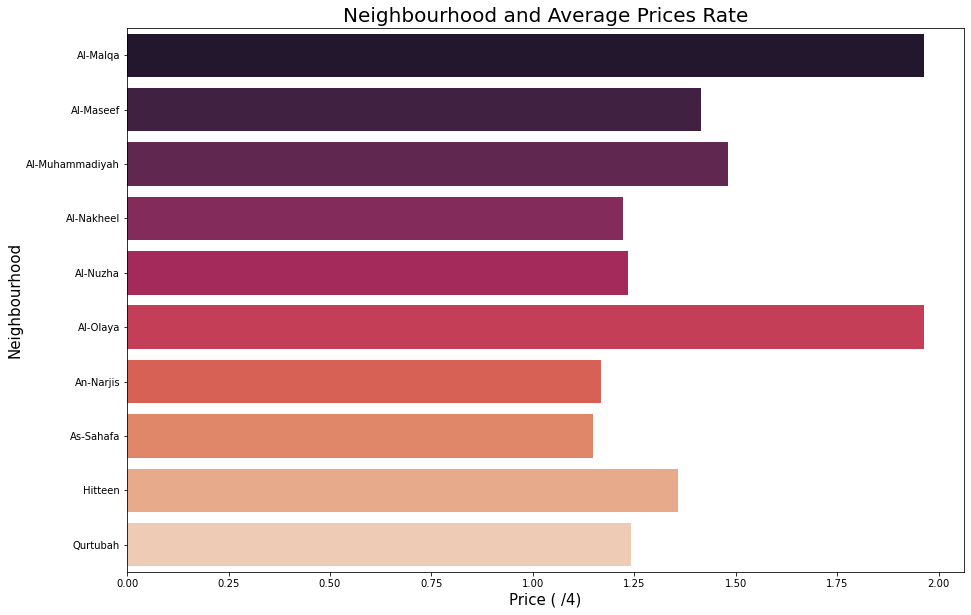

In [40]:
plt.figure(figsize=(15 , 10))
sns.barplot(data = bar , x = 'price' , y = 'Neighbourhood', palette="rocket" )
plt.title('Neighbourhood and Average Prices Rate' , size = 20)
plt.ylabel('Neighbourhood' , size = 15)
plt.xlabel('Price ( /4)' , size = 15)
plt.show()

## AL Malqa and Al Olaya prices is high comparing to other Neighbourhoods

Text(0, 0.5, 'Count')

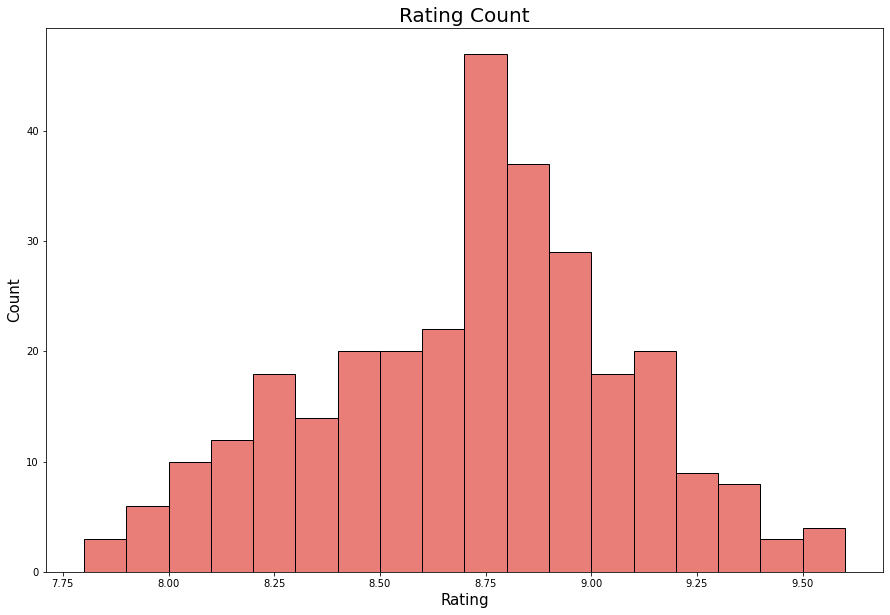

In [41]:
plt.figure(figsize=(15 , 10))
sns.histplot(data = df , x = 'Rating' , bins =18)
plt.title('Rating Count' , size = 20)
plt.xlabel('Rating' , size = 15)
plt.ylabel('Count' , size = 15)

## Most of Restaurants rating is between 8.5 - 9
## Rating has a normal distribution 

In [42]:
tmp = df.sort_values('Rating').head(10)
tmp

,Name,Rating,price,Neighbourhood
299,Qurrah,7.8,1.0,Al-Nuzha
298,Crepe Car,7.8,1.0,Al-Nuzha
297,مخبز تميس شركة وارب,7.8,1.0,Al-Nuzha
296,Shawarma Classic,7.9,2.0,Al-Nuzha
295,Mouthful,7.9,1.0,Al-Nuzha
294,Beit Omar,7.9,2.0,Al-Nuzha
293,Haseel For BBQ,7.9,2.0,Al-Nuzha
238,بليلة ولد الديرة,7.9,1.0,An-Narjis
239,كعك وجبن,7.9,1.0,An-Narjis
236,BISTECCA,8.0,4.0,An-Narjis


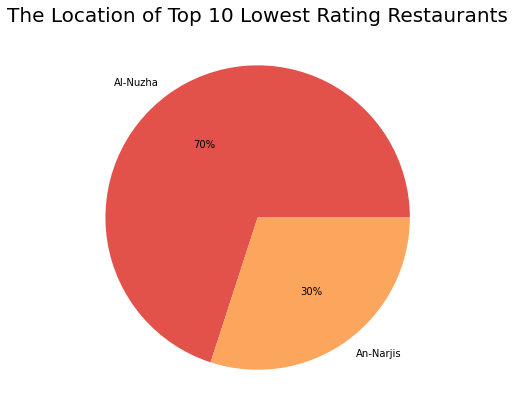

In [43]:
plt.figure(figsize=(7 , 7))
sns.set_palette("Spectral")
plt.pie(tmp['Neighbourhood'].value_counts() ,labels=tmp['Neighbourhood'].value_counts().keys() , autopct='%.0f%%' ,  )
plt.title('The Location of Top 10 Lowest Rating Restaurants' , size = 20)
plt.show()

## اذا كنت جوعان لا تروح النزهة 

In [44]:
tmp = df.groupby('Name' , as_index=False).count().sort_values(by='price' , ascending=False).head(5)


In [45]:
tmp

,Name,Rating,price,Neighbourhood
42,Dunkin Donuts,27,27,27
117,McDonald’s,10,10,10
40,Domino's Pizza,4,4,4
177,Tutti Cafè,4,4,4
8,Al Hatab Bakery,3,3,3


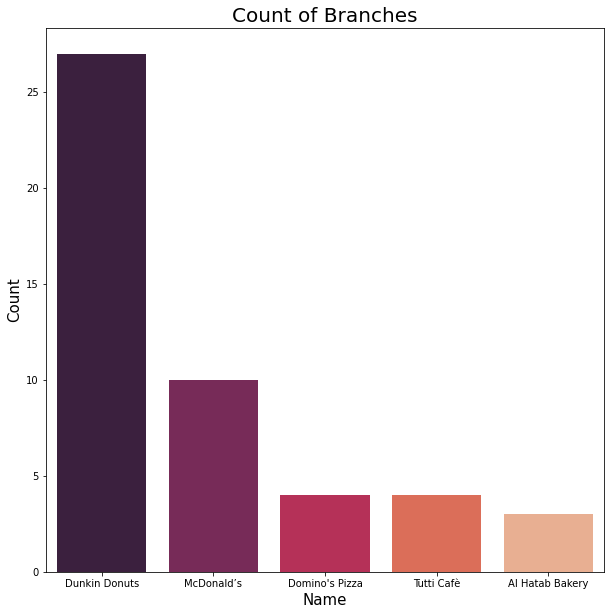

In [46]:
plt.figure(figsize=(10 , 10))
sns.barplot(data = tmp , x = 'Name' , y= 'Rating' ,palette="rocket")
plt.xlabel('Name' , size = 15)
plt.ylabel('Count' , size = 15)
plt.title('Count of Branches' , size = 20)
plt.show()

## دانكن اكثر مقهى او مطعم عنده فروع 